This is a part with a graphs for my diploma

In [1]:
from sympy import*
from sympy import plot
#import matplotlib.pyplot as plt
init_printing()

In [2]:
I, Delta_w, w, w_r, theta = symbols('I, Delta_w, w, w_r, theta')
k_w, lambda_w, L, c, gamma_bar = symbols('k_w, lambda_w, L, c, gamma_bar')

/home/andrei/anaconda3/lib/python3.6/site-packages/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


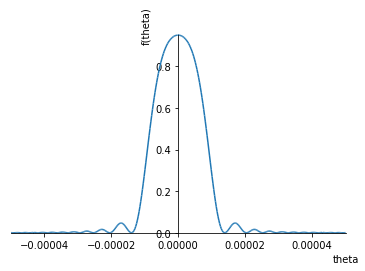

In [7]:
c = 299792458#m/s
L = 2.5 #m
lambda_w = 20 * 1e-3#m undulator length
gamma_bar = 6000#Ebeam/m_e
k_w = 2*pi/lambda_w
w_r = 2*c*gamma_bar**2*k_w#resonant frequency
Delta_w = w - w_r
w = w_r + 0.0001*w_r
I = (sinc((k_w*Delta_w/w_r + w*theta**2/2/c)*L/2))**2
I
plot(I, (theta, -0.00005, 0.00005), adaptive=False, nb_of_points=400) 

ValueError: The arguments must be Symbols.

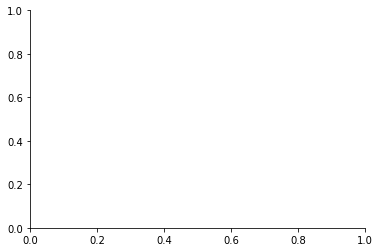

In [14]:
c = 299792458#m/s
L = 2.5 #m
lambda_w = 20 * 1e-3#m undulator length
gamma_bar = 6000#Ebeam/m_e
k_w = 2*pi/lambda_w
w_r = 2*c*gamma_bar**2*k_w#resonant frequency
theta = -0.00002
Delta_w = w - w_r
I = (sinc((k_w*Delta_w/w_r + w*theta**2/2/c)*L/2))**2
plot(I, (w, 0.64e19, 0.7e19), adaptive=False, nb_of_points=400) 